# Genome-scale metabolic models

## Preparation

In [14]:
from cameo import load_model

model = load_model('data/iJO1366.xml.gz')

## Model content

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [15]:
model.metabolites[0:10]

[<Metabolite 10fthf_c at 0x11817f438>,
 <Metabolite 12dgr120_c at 0x1181069b0>,
 <Metabolite 12dgr140_c at 0x118106cf8>,
 <Metabolite 12dgr141_c at 0x118106f60>,
 <Metabolite 12dgr160_c at 0x118108208>,
 <Metabolite 12dgr161_c at 0x1181084e0>,
 <Metabolite 12dgr180_c at 0x118108780>,
 <Metabolite 12dgr181_c at 0x118108a20>,
 <Metabolite 12ppd__R_c at 0x118635518>,
 <Metabolite 12ppd__S_c at 0x118635710>]

There are 1805 metabolites in the model.

In [16]:
len(model.metabolites)

1805

One can access a specific metabolite using dot notation.

In [17]:
model.metabolites.g3p_c

Id,g3p_c
Name,Glyceraldehyde 3-phosphate
Formula,C3H5O6P


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [18]:
model.metabolites.10fthf_c

SyntaxError: invalid syntax (<ipython-input-18-2772b042e9ed>, line 1)

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [19]:
model.metabolites.get_by_id('10fthf_c')

Id,10fthf_c
Name,10-Formyltetrahydrofolate
Formula,C20H21N7O7


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` (Cytosol) compartment.

In [20]:
model.metabolites.g3p_c.compartment

'c'

The _E. coli_ model has three compartments.

In [21]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [22]:
model.metabolites.glc__D_c.compartment

'c'

In [23]:
model.metabolites.glc__D_p.compartment

'p'

The full name of the metabolite is available via the `.name` attribute. 

In [27]:
model.metabolites.glc__D_c.name

'D-Glucose'

One can look up the molecular formula of glucose.

In [24]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The `.elements` attribute returns a dictionary representation of the formula.

In [25]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [26]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [10]:
model.metabolites.g3p_c.annotation

{'SBO': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:12983',
  'CHEBI:12984',
  'CHEBI:14333',
  'CHEBI:17138',
  'CHEBI:181',
  'CHEBI:18324',
  'CHEBI:21026',
  'CHEBI:29052',
  'CHEBI:5446',
  'CHEBI:58027',
  'CHEBI:59776'],
 'hmdb': 'HMDB01112',
 'kegg.compound': ['C00118', 'C00661'],
 'metanetx.chemical': 'MNXM2378',
 'reactome': '29578',
 'seed.compound': 'cpd00102',
 'unipathway.compound': ['UPC00118', 'UPC00661']}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate in reactions as substrates and products.

In [13]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction TRPS3 at 0x117d44828>,
           <Reaction GAPD at 0x11c42c470>,
           <Reaction F6PA at 0x11c414278>,
           <Reaction TRPS1 at 0x117d444e0>,
           <Reaction EDA at 0x11c40a4e0>,
           <Reaction TPI at 0x117d41518>,
           <Reaction TGBPA at 0x117d38128>,
           <Reaction DXPS at 0x11b9f3550>,
           <Reaction TKT2 at 0x117d3dd68>,
           <Reaction FBA at 0x11c41a358>,
           <Reaction DDPGALA at 0x11bae69b0>,
           <Reaction TALA at 0x117d343c8>,
           <Reaction TKT1 at 0x117d3dbe0>,
           <Reaction DRPA at 0x11b9827f0>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [28]:
model.reactions[0:10]

[<Reaction DM_4crsol_c at 0x11da0ff98>,
 <Reaction DM_5drib_c at 0x11da0ffd0>,
 <Reaction DM_aacald_c at 0x11da0feb8>,
 <Reaction DM_amob_c at 0x11da0fd68>,
 <Reaction DM_mththf_c at 0x11da0fd30>,
 <Reaction DM_oxam_c at 0x11da0fc50>,
 <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x11da0fc88>,
 <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x11d8fe278>,
 <Reaction EX_12ppd__R_e at 0x11d8ecc18>,
 <Reaction EX_12ppd__S_e at 0x11d8ec8d0>]

There are 2583 reactions in the model.

In [29]:
len(model.reactions)

2583

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [31]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction.id, reaction, reaction.name)

DRPA DRPA: 2dr5p_c --> acald_c + g3p_c Deoxyribose-phosphate aldolase
GAPD GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
F6PA F6PA: f6p_c <=> dha_c + g3p_c Fructose 6-phosphate aldolase
DDPGALA DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c 2-dehydro-3-deoxy-6-phosphogalactonate aldolase
TRPS1 TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c Tryptophan synthase (indoleglycerol phosphate)
EDA EDA: 2ddg6p_c --> g3p_c + pyr_c 2-dehydro-3-deoxy-phosphogluconate aldolase
TPI TPI: dhap_c <=> g3p_c Triose-phosphate isomerase
TGBPA TGBPA: tagdp__D_c <=> dhap_c + g3p_c Tagatose-bisphosphate aldolase
TKT2 TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transketolase
DXPS DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c 1-deoxy-D-xylulose 5-phosphate synthase
FBA FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase
TALA TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
TKT1 TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase
TRPS3 TRPS3: 3ig3p

The second reaction in this list is Glyceraldehyde-3-phosphate dehydrogenase (GAPD).

In [33]:
model.reactions.GAPD.name

'Glyceraldehyde-3-phosphate dehydrogenase'

## Objective

In [5]:
print(model.objective)

Maximize
-1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 1.0*BIOMASS_Ec_iJO1366_core_53p95M


## ATP maintenance requirement

In [4]:
model.reactions.ATPM

Id,ATPM
Name,ATP maintenance requirement
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c
GPR,
Lower bound,3.150000
Upper bound,1000.000000


## The math (scary!)

In [39]:
print(model.solver.__str__()[0:1550])

\ENCODING=ISO-8859-1
\Problem name: 

Maximize
 _4d6e30d2m7390m11e6m8507mf45c89a5d5e9#0: BIOMASS_Ec_iJO1366_core_53p95M#14
                                          - BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1#15
Subject To
 _10fthf_c#0:             - 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M#12
                          + 0.000223 BIOMASS_Ec_iJO1366_WT_53p95M_reverse_06c4a#13
                          - 0.000223 BIOMASS_Ec_iJO1366_core_53p95M#14
                          + 0.000223 BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1#15
                          - AICART#1208 + AICART_reverse_b7b59#1209
                          - FMETTRS#2436 + FMETTRS_reverse_3b6c6#2437
                          - FTHFD#2480 + FTHFD_reverse_44321#2481 + FTHFLi#2482
                          - FTHFLi_reverse_a6dc7#2483 - GARFT#2630
                          + GARFT_reverse_7ecb6#2631 + MTHFC#3692
                          - MTHFC_reverse_f6fcc#3693 - ULA4NFT#5050
                          + ULA4NFT_reverse_072

## Gene-Protein-Reaction associations

Glyceraldehyde-3-phosphate dehydrogenase is associated with a single gene. 

In [44]:
model.reactions.GAPD.gene_reaction_rule

'b1779'

Phosphofructokinase (PFK) on the other hand seems to be associated with to isozymes.

In [46]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [48]:
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

Here a very complicated gene to reaction mapping (ATP synthase).

In [51]:
model.reactions.ATPS4rpp.gene_name_reaction_rule

'(atpA and atpD and atpC and atpG and atpH and atpE and atpF and atpB and atpI) or (atpB and atpF and atpE and atpH and atpG and atpC and atpD and atpA)'

## Finding things

One can use `.query('search term', 'attribute_to_search_in')` to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term _glucose_ in their name.

In [61]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

6-Acetyl-D-glucose
ADPglucose
DTDP-4-dehydro-6-deoxy-D-glucose
DTDPglucose
UDPglucose
UDPglucose
UDPglucose


In [20]:
model..query()

## Exercise

* TBD

## The stoichiometric matrix S

In [59]:
S = model.to_array_based_model().S.todense()
S

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., -1., -1.,  1.]])

This is how the the stoichiometry matrix S looks like when visualized as a matrix plot.

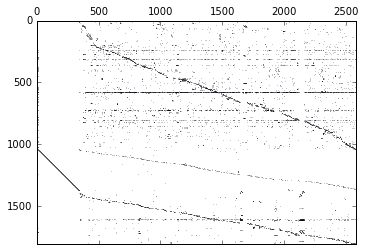

In [60]:
import matplotlib.pyplot as plt
plt.spy(S, precision=0.01, markersize=.1)

## Simulating models

In [5]:
model.solve()

,fluxes,reduced_costs
DM_4crsol_c,0.000219,-3.168299e-13
DM_5drib_c,0.000221,0.000000e+00
DM_aacald_c,0.000000,0.000000e+00
DM_amob_c,0.000002,0.000000e+00
...,...,...
ZN2t3pp,0.000000,-2.073827e-03
ZN2tpp,0.000335,0.000000e+00
ZNabcpp,0.000000,-8.295308e-03
Zn2tex,0.000335,0.000000e+00


Somtimes a solution cannot be found. For example, setting the lower bound of the objective funtion to a very high value that the model cannot achieve will raise an exception when trying to solve the model.

In [12]:
infeasible_model = model.copy()
infeasible_model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.lower_bound = 100000
infeasible_model.solve()

Infeasible: Solving model iJO1366 did not return an optimal solution. The returned solution status is "infeasible"

One can use `try` and `except` statements to handle those cases.

In [10]:
from cameo.exceptions import Infeasible

In [13]:
try:
    infeasible_model.solve()
except Infeasible:
    print('Oh no! The model is infeasible!')

Oh no! The model is infeasible!
